In [5]:
import functions
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

acccelerations = [1, 2, 3, 4]
L = 500
N = 75
p = 0.2
vmax = 5
tmax = 500

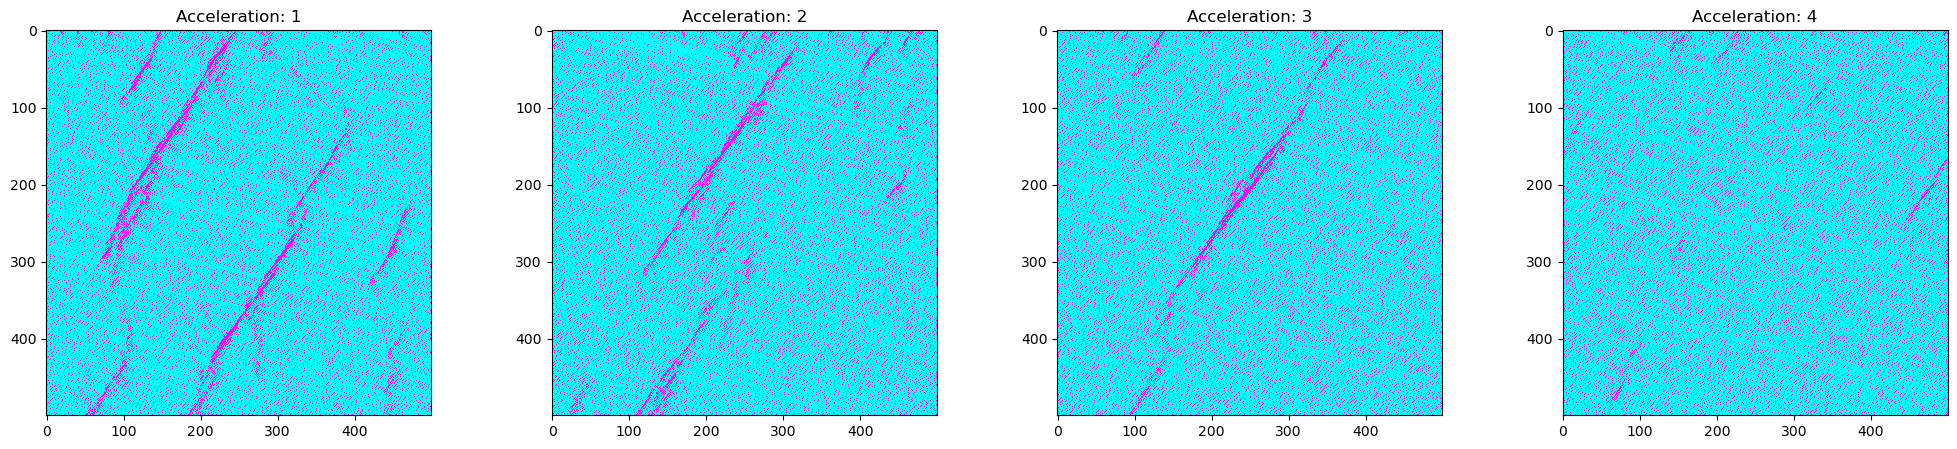

In [6]:
fig, axs = plt.subplots(1,len(acccelerations), figsize = (25, 5))
for accel in acccelerations:
    simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax, max_acceleration=accel)[0]
    points = np.zeros((tmax, L))
    for i in range(L):
        for j in range(tmax):
            if simulation[j][i] > -1:
                points[j][i] = 1
            else:
                points[j][i] = 0
    axs[acccelerations.index(accel)].set_title(f'Acceleration: {accel}')
    axs[acccelerations.index(accel)].imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()

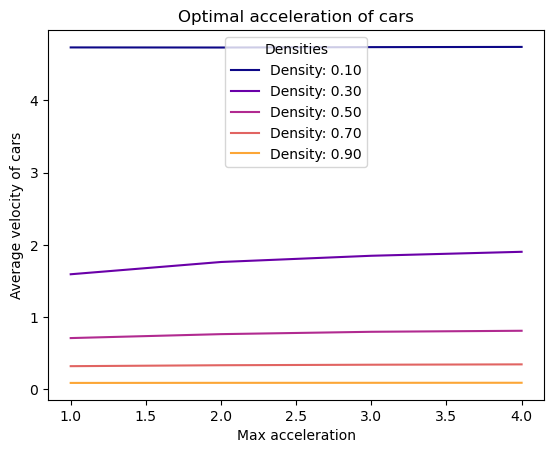

In [7]:
# Parameters
L = 500
N = 250
p = 0.2
v_max = 5
t_max = 1000

maximum_acceleration = np.arange(1, 5, 1)
densities = np.linspace(0.1, 0.9, 5)

velocity_averages = []

for a in maximum_acceleration:
    for density in densities:
        velocity_average = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max, max_acceleration = a)[4]
        velocity_averages.append(velocity_average)

# Reshape velocity_averages to match the shape of max_acceleration and densities
velocity_averages = np.array(velocity_averages).reshape(len(maximum_acceleration), len(densities))

# For each density
for i in range(len(densities)):
    # Plotting the lines with gradients of colour
    colour = plt.cm.plasma(i / float(len(densities)))

    plt.plot(maximum_acceleration, velocity_averages[:, i], color=colour, label=f'Density: {densities[i]:.2f}')


plt.xlabel('Max acceleration')
plt.ylabel('Average velocity of cars')
plt.title('Optimal acceleration of cars')
plt.legend(title='Densities')
plt.show()


This graph just shows that a higher acceleration doesn't help much in improving the overall speed in our model. Although intuitively accelerating fast would be beneficial, but maybe not if not everyone can accelerate fast? Also in the above CA plots it looks like the traffic clusters dissapear as the max acceleration increases. So maybe you're less stuck in traffic with good acceleration, but you don't get to your destination any faster.

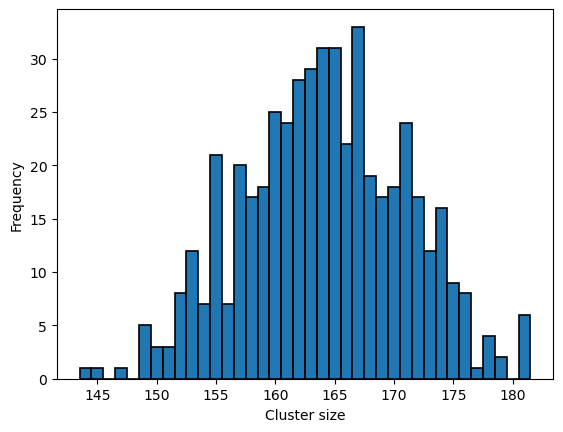

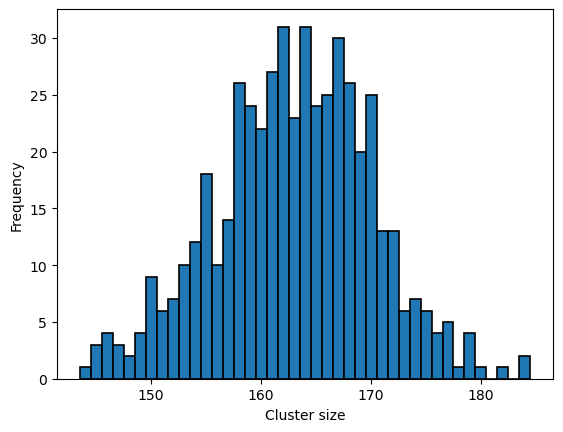

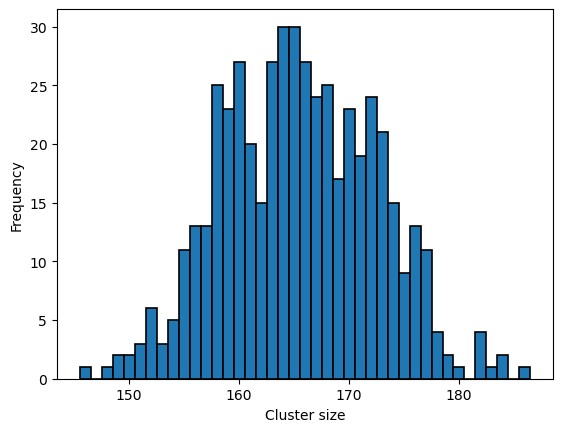

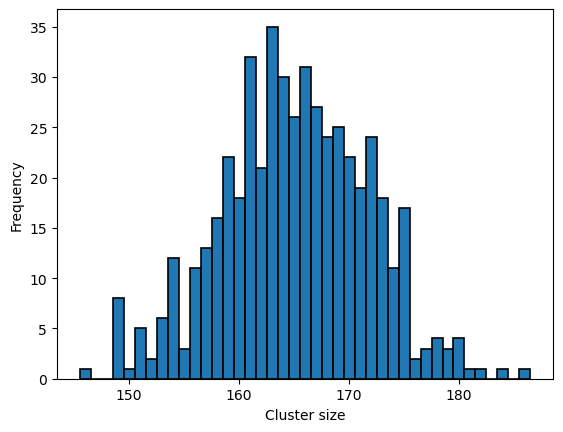

In [8]:
for accel in acccelerations:
    cluster_distribution = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax, max_acceleration=accel)[1]
    x = np.arange(min(cluster_distribution), max(cluster_distribution))

    # Plotting
    plt.hist(cluster_distribution, bins = len(x), align = 'left', edgecolor = 'black', linewidth = 1.2)
    plt.xlabel('Cluster size')
    plt.ylabel('Frequency')
    plt.show()

In [9]:
# cluster_averages = []

# for accel in acccelerations:
#     cluster_list = simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax, max_acceleration=accel)[1]
#     cluster_average = np.mean(cluster_list)
#     cluster_averages.append(cluster_average)

# # Plotting
# plt.plot(acccelerations, cluster_averages)
# plt.xlabel('Acceleration')
# plt.ylabel('Average number of cells in clusters')
# plt.title('Average cells in cluster vs acceleration')
# plt.show()